In [17]:
#import piplite
#await piplite.install('seaborn')

import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import seaborn as sns

<center>
    <h1> Chute d'une goutte d'eau dans différents milieux </h1>
</center>

## 1. Chute d'une goutte d'eau dans l'air

> L'objectif de cette partie est d'étudier le mouvement de la goutte dans l'air et d'en déduire ses caractéristiques.

### 1.1. Partie expérimentale

- Charger la [vidéo](https://www.icloud.com/iclouddrive/064P0Q6rYzhxCuZABVTUKTHXA#oil-drop) dans le logiciel [Mecachrono](https://www.eleves.online/MecaChrono/index.php?A=5&B=0&C=0&D=15&E=18&H=-48535135&lang=fr).
- Sélectionner « 30 images par seconde » et « un échantillon toutes les 3 images ».
- Placer l'origine et le repère à un endroit qui vous semblera opportun.
- Définir l'échelle en utilisant la règle à l'écran.
- Sélectionner les différentes positions de la goutte.
- Sélectionner l'onglet « Tableau de valeurs » et exporter les données sous une forme directement exploitable sous Python.

### 1.2. Exploitation

1. Insérer les listes contenant les dates $t$ et les valeurs de l'ordonnée $y$.

In [18]:
t = [ 0, 0.033333, 0.066666, 0.1, 0.133333, 0.166667, 0.2]
y = [0.34868, 0.345205, 0.326093, 0.29424, 0.249067, 0.189415, 0.111809]

2. Compléter le code suivant. L'objectif est d'afficher $y$ en fonction de $t$.

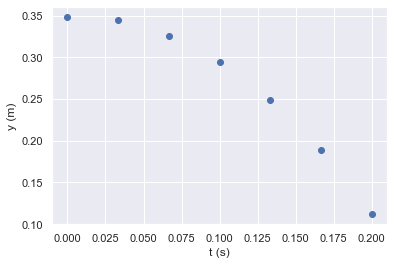

In [20]:
sns.set()
plt.plot(t, y, 'o')
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.show()

3. On souhaite modéliser le comportement de la goutte. Compléter le code suivant.

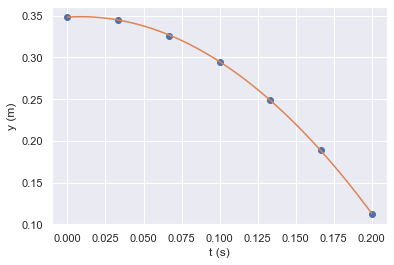

Paramètres de la modélisation : -6.42848427663765, 0.10796388394914253, 0.3484178579649719


In [21]:
# Fonction modèle
def modele(x, a, b, c):
    return a * x**2 + b * x + c

# Détermination des paramètres optimaux
popt, pcov = curve_fit(modele, t, y)
a_mod = popt[0]
b_mod = popt[1]
c_mod = popt[2]

# Tracé
t_mod = np.linspace(min(t), max(t), 100)
y_mod = modele(t_mod, a_mod, b_mod, c_mod)

sns.set()
plt.plot(t, y, 'o')
plt.plot(t_mod, y_mod)
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.show()

print("Paramètres de la modélisation : {}, {}, {}".format(a_mod, b_mod, c_mod))

4. Quel type de mouvement laisse entrevoir le résultat de la modélisation ?

5. On souhaite maintenant établir l'évolution de la composante verticale de la vitesse de la goutte en fonction du temps.    
    Compléter le code suivant (en n'oubliant pas de répondre aux questions posées).
    
> **Remarque :** l'opération de **dérivation numérique** introduit du bruit. *On ne va donc pas travailler à partir des résultats expérimentaux* $t$ *et* $y$ *mais à partir des grandeurs résultats de la modélisation* $t_{mod}$ et $y_{mod}$.

In [22]:
vy = [0] * len(t_mod)  # création d'une liste de même dimension que t_mod, ne contenant que des 0

vy[0] = (y_mod[1] - y_mod[0]) / (t_mod[1] - t_mod[0])  # Que fait-on ici ?

indice_max = len(t_mod) - 1                            # indice du dernier élément de la liste
vy[indice_max] = (y_mod[indice_max] - y_mod[indice_max - 1]) / (t_mod[indice_max] - t_mod[indice_max - 1])  # Que fait-on ici ?

for i in range(1, indice_max):
    vy[i] = (y_mod[i + 1] - y_mod[i - 1]) / (t_mod[i + 1] - t_mod[i - 1])

6. Afficher l'évolution de la composante verticale de la vitesse de la goutte en fonction du temps.

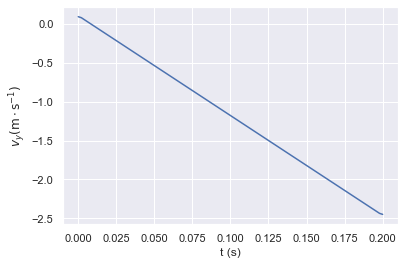

In [29]:
sns.set()
plt.plot(t_mod, vy, '-')
plt.xlabel("t (s)")
plt.ylabel(r"$v_y (\mathrm{m}\cdot\mathrm{s}^{-1})$")
plt.show()

7. Pourquoi la composante verticale de la vitesse de la goutte est-elle négative ?

8. On souhaite maintenant déterminer l'évolution de la composante verticale de l'accélération de la goutte en fonction du temps.    
    Compléter le code suivant (en n'oubliant pas de répondre aux questions).

In [30]:
ay = [0] * len(t_mod)  # que fait-on ici ?

ay[0] = (vy[1] - vy[0]) / (t_mod[1] - t_mod[0])  # Que fait-on ici ?

indice_max = len(t_mod) - 1  # indice du dernier élément de la liste
ay[indice_max] = (vy[indice_max] - vy[indice_max - 1]) / (t_mod[indice_max] - t_mod[indice_max - 1])  # Que fait-on ici ?

for i in range(1, indice_max):
    ay[i] = (vy[i + 1] - vy[i - 1]) / (t_mod[i + 1] - t_mod[i - 1])

9. Afficher l'évolution de la composante verticale de l'accélération de la goutte en fonction du temps.

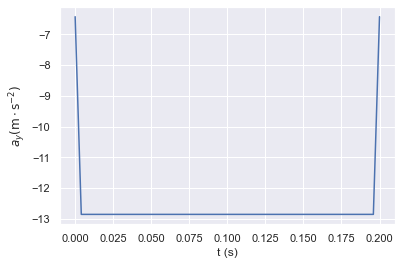

In [31]:
sns.set()
plt.plot(t_mod, ay, '-')
plt.xlabel("t (s)")
plt.ylabel(r"$a_y (\mathrm{m}\cdot\mathrm{s}^{-2})$")
plt.show()

10. Le résultat obtenu confirme-t-il la réponse à la question 4 ?

### 1.3. Évolution de l'énergie mécanique massique

1. Construire la liste $ec$ contenant les valeurs de l'énergie cinétique massique de la goutte au cours de son mouvement.

In [32]:
ec = []
for v in vy:
    ec.append(0.5 * v**2)

2. Constuire la liste $e_{pp}$ contenant les valeurs de l'énergie potentielle de pesanteur massique de la goutte au cours de son mouvement.

**Remarque :** On considérera que l'énergie potentielle de pesanteur est nulle lorsque $y_{mod}=0$.

In [33]:
epp = []
for y in y_mod:
    epp.append(9.81 * y)

3. Construire la liste $e_m$ contenant les valeurs de l'énergie mécanique de la goutte au cours de son mouvement.

In [34]:
em = []
for i in range(len(t_mod)):
    em.append(ec[i] + epp[i])

4. Afficher sur le même graphique les évolutions des énergie cinétique, potentielle de pesanteur et mécanique.

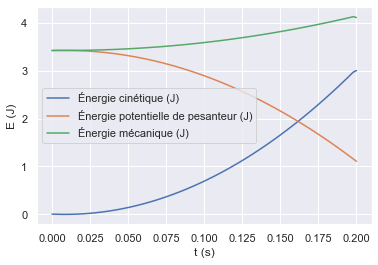

In [35]:
sns.set()
plt.plot(t_mod, ec, '-', label="Énergie cinétique (J)")
plt.plot(t_mod, epp, '-', label="Énergie potentielle de pesanteur (J)")
plt.plot(t_mod, em, '-', label="Énergie mécanique (J)")
plt.xlabel("t (s)")
plt.ylabel("E (J)")
plt.legend()
plt.show()

5. L'énergie mécanique se conserve-t-elle ?

## 2. Chute d'une goutte dans une huile de moteur

La bouteille présente sur le film contient une huile de moteur minérale utilisée dans les moteurs de voiture. 

> L'objectif de cette partie est de déterminer le mouvement de la goutte dans l'huile et d'en déduire ses caractéristiques.

### 2.1. Partie expérimentale

- Charger la [vidéo](https://www.icloud.com/iclouddrive/064P0Q6rYzhxCuZABVTUKTHXA#oil-drop) dans le logiciel [Mecachrono](https://www.eleves.online/MecaChrono/index.php?A=5&B=0&C=0&D=15&E=16&H=-1823542497&lang=fr).
- Sélectionner « 30 images par seconde » et « un échantillon toutes les 30 images ».
- Placer l'origine à un endroit qui vous semblera opportun.
- Définir l'échelle en utilisant la règle à l'écran.
- Sélectionner les différentes positions de la goutte (attendre, pour la première position que la goutte soit à environ 1 cm en dessous de la surface).
- Sélectionner l'onglet « Tableau de valeurs » et exporter les données sous une forme directement exploitable sous Python.

### 2.2. Exploitation

1. Insérer les listes contenant les dates $t$ et les valeurs de l'ordonnée $y$.

In [36]:
t = [ 15.8667, 16.8667, 17.8667, 18.8667, 19.8667, 20.8667, 21.8667, 22.8667, 23.8667, 24.8667, 25.8667, 26.8667, 27.8667, 28.8667, 29.8667, 30.8667, 31.8667, 32.8667, 33.8667, 34.8667, 35.8667, 36.8667, 37.8667, 38.8667, 39.8667, 40.8667, 41.8667, 42.8667, 43.8667, 44.8667, 45.8667]
y = [0.284591, 0.277131, 0.269138, 0.261678, 0.254751, 0.247291, 0.239831, 0.231838, 0.224378, 0.216385, 0.209458, 0.200933, 0.194005, 0.186013, 0.178553, 0.171093, 0.1631, 0.15564, 0.147647, 0.140187, 0.132727, 0.125267, 0.117274, 0.109281, 0.101821, 0.0943614, 0.0869014, 0.0799742, 0.0725143, 0.0629228, 0.0538643]

2. Compléter le code suivant. L'objectif est d'afficher $y$ en fonction de $t$.

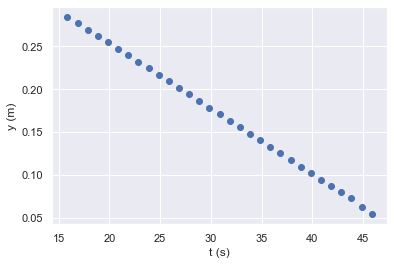

In [37]:
sns.set()
plt.plot(t, y, 'o')
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.show()

3. Commenter l'allure de la courbe obtenue. Que peut-on dire de la valeur de la vitesse ? Qualifier le mouvement.

4. Afin de déterminer la valeur de la vitesse de chute, on cherche à modéliser la courbe précédente.   
    Compléter le code suivant.

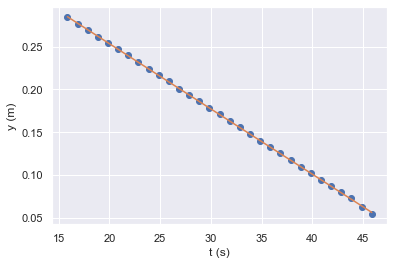

Paramètres de la modélisation : -0.007634235725797023 et 0.40630654774842684


In [38]:
# Fonction modèle
def modele(x, a, b):
    return a * x + b

# Détermination des paramètres optimaux
popt, pcov = curve_fit(modele, t, y)
a_mod = popt[0]
b_mod = popt[1]

# Tracé
t_mod = np.linspace(min(t), max(t), 100)
y_mod = modele(t_mod, a_mod, b_mod)

sns.set()
plt.plot(t, y, 'o')
plt.plot(t_mod, y_mod)
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.show()

print("Paramètres de la modélisation : {} et {}".format(a_mod, b_mod))

5. Indiquer la valeur de la vitesse de chute.

6. Que peut-on dire des forces qui agissent sur la goutte d'eau ? Énumérer ces forces et faire un schéma.

7. L'énergie mécanique reste-t-elle constante au cours du mouvement ? Justifier son évolution.